In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Dataset Link: https://drive.google.com/drive/folders/18IN1Nwgr7OOCp_WoGJgqgTUnCtKGiasm?usp=sharing

In [ ]:
#Step 1: Load and Explore Data
import pandas as pd
import numpy as np

# Load datasets
adult_df = pd.read_csv('/content/drive/MyDrive/Intellipaat Colab Files/Income Prediction using Census Data/adult.csv')
census_df = pd.read_csv('/content/drive/MyDrive/Intellipaat Colab Files/Income Prediction using Census Data/census-income.csv')
popdata_df = pd.read_csv('/content/drive/MyDrive/Intellipaat Colab Files/Income Prediction using Census Data/popdata.csv')

# Display dataset shapes
print(f"Adult Dataset Shape: {adult_df.shape}")
print(f"Census Dataset Shape: {census_df.shape}")
print(f"Population Dataset Shape: {popdata_df.shape}")

# Display first few rows
print("Adult Dataset Sample:")
print(adult_df.head(), "\n")

print("Census Dataset Sample:")
print(census_df.head(), "\n")

print("Population Dataset Sample:")
print(popdata_df.head(), "\n")

# Check for missing values
print("Missing Values in Adult Dataset:\n", adult_df.isnull().sum())
print("Missing Values in Census Dataset:\n", census_df.isnull().sum())
print("Missing Values in Population Dataset:\n", popdata_df.isnull().sum())


Adult Dataset Shape: (48842, 15)
Census Dataset Shape: (32561, 15)
Population Dataset Shape: (816, 2)
Adult Dataset Sample:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             

In [ ]:
#Step 2: Data Preprocessing

#1. Handling Missing Values
import pandas as pd
import numpy as np

# Replace missing values represented as '?' with NaN
adult_df.replace('?', np.nan, inplace=True)
census_df.replace('?', np.nan, inplace=True)
popdata_df.replace('?', np.nan, inplace=True)

# Fill missing values with mode for categorical columns and mean for numerical columns
for df in [adult_df, census_df, popdata_df]:
    for col in df.columns:
        if df[col].dtype == 'object':
            df.loc[:, col] = df[col].fillna(df[col].mode()[0])
        else:
            df.loc[:, col] = df[col].fillna(df[col].mean())

print("Missing values handled successfully.")




Missing values handled successfully.


### **Explanation of the Code for Handling Missing Values**
This code ensures that missing values in the datasets are handled properly without triggering **FutureWarnings** in Pandas. Here’s what each part does:

---

### **1) Replacing '?' with NaN**
```python
adult_df.replace('?', np.nan, inplace=True)
census_df.replace('?', np.nan, inplace=True)
popdata_df.replace('?', np.nan, inplace=True)
```
- The datasets might have **missing values represented as `'?'`** instead of `NaN`.
- This code replaces all occurrences of `'?'` with `np.nan` (actual missing values) for proper handling.

---

### **2) Iterating Over All Datasets**
```python
for df in [adult_df, census_df, popdata_df]:
```
- Instead of writing the same code for each dataset, we loop through all three datasets at once.
- This makes the code **cleaner and more efficient**.

---

### **3) Handling Missing Values in Each Column**
```python
for col in df.columns:
```
- We iterate through **each column** in the dataset.

#### **Handling Categorical Columns (Object Type)**
```python
if df[col].dtype == 'object':  
    df.loc[:, col] = df[col].fillna(df[col].mode()[0])
```
- If the column is **categorical (text-based)**, we replace missing values with **the most frequent value (mode)**.
- **Example:** If `occupation` has missing values, and most people have `"Private"`, it fills `NaN` with `"Private"`.

#### **Handling Numerical Columns (Int/Float)**
```python
else:
    df.loc[:, col] = df[col].fillna(df[col].mean())
```
- If the column is **numerical (int/float)**, we replace missing values with **the column's mean value**.
- **Example:** If `age` has missing values, it replaces them with the **average age**.

---

### **4) Preventing FutureWarning**
```python
df.loc[:, col] = df[col].fillna(df[col].mode()[0])
```
- **Why `df.loc[:, col]` instead of `df[col]`?**
  - `df[col]` creates a **temporary copy**, and `pandas 3.0+` will not allow modifying it.
  - `df.loc[:, col]` ensures we modify the original DataFrame directly.

---

### **🔹 Summary:**
✔ Replaces `'?'` with `NaN`.  
✔ Loops over all datasets efficiently.  
✔ Uses **mode for categorical** and **mean for numerical** missing values.  
✔ Prevents **FutureWarning** with `df.loc[:, col]`.  

---
  


In [ ]:
#2. Handling Duplicates - We will check if there are duplicate rows in the dataset and remove them.
# Check for duplicate rows
print(f"Duplicate rows in Adult Dataset: {adult_df.duplicated().sum()}")
print(f"Duplicate rows in Census Dataset: {census_df.duplicated().sum()}")
print(f"Duplicate rows in Population Dataset: {popdata_df.duplicated().sum()}")

# Drop duplicate rows
adult_df.drop_duplicates(inplace=True)
census_df.drop_duplicates(inplace=True)
popdata_df.drop_duplicates(inplace=True)

print("Duplicates removed successfully.")


Duplicate rows in Adult Dataset: 53
Duplicate rows in Census Dataset: 24
Duplicate rows in Population Dataset: 0
Duplicates removed successfully.


In [ ]:
#3. Handling Outliers
#We will detect and remove outliers using the Interquartile Range (IQR) Method.

def remove_outliers(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df

# Apply outlier removal
adult_df = remove_outliers(adult_df)
census_df = remove_outliers(census_df)
popdata_df = remove_outliers(popdata_df)

print("Outliers removed successfully.")

Outliers removed successfully.


In [ ]:
#4. Encoding Categorical Features - Since machine learning models require numerical data, we need to encode categorical features.
from sklearn.preprocessing import LabelEncoder

def encode_categorical(df):
    categorical_cols = df.select_dtypes(include=['object']).columns
    encoder = LabelEncoder()

    for col in categorical_cols:
        df[col] = encoder.fit_transform(df[col])

    return df

# Apply encoding
adult_df = encode_categorical(adult_df)
census_df = encode_categorical(census_df)
popdata_df = encode_categorical(popdata_df)

print("Categorical variables encoded successfully.")

Categorical variables encoded successfully.


In [ ]:
#5. Feature Scaling - We apply Min-Max Scaling to normalize the numerical features.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Get numerical columns for each dataset separately
numerical_cols_adult = adult_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_census = census_df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols_popdata = popdata_df.select_dtypes(include=['int64', 'float64']).columns

# Apply Min-Max Scaling only on numerical columns
adult_df[numerical_cols_adult] = scaler.fit_transform(adult_df[numerical_cols_adult])
census_df[numerical_cols_census] = scaler.fit_transform(census_df[numerical_cols_census])
popdata_df[numerical_cols_popdata] = scaler.fit_transform(popdata_df[numerical_cols_popdata])

print("Feature scaling applied successfully.")


Feature scaling applied successfully.


In [ ]:
#Step 3: Exploratory Data Analysis (EDA)
#EDA helps us understand the dataset better by visualizing distributions, correlations, and feature relationships.

#Basic Statistical Summary - First, let's check the summary statistics of our dataset.
# Display summary statistics
print(adult_df.describe())

                age     workclass        fnlwgt     education  \
count  28522.000000  28522.000000  28522.000000  28522.000000   
mean       0.345068      0.433265      0.412707      0.681987   
std        0.197837      0.160146      0.215413      0.252937   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.180328      0.428571      0.255421      0.545455   
50%        0.327869      0.428571      0.403353      0.727273   
75%        0.491803      0.428571      0.534476      0.818182   
max        1.000000      1.000000      1.000000      1.000000   

       educational-num  marital-status    occupation  relationship  \
count     28522.000000    28522.000000  28522.000000  28522.000000   
mean          0.476927        0.424503      0.449378      0.285478   
std           0.195344        0.253768      0.311276      0.318881   
min           0.000000        0.000000      0.000000      0.000000   
25%           0.363636        0.333333      0.153846      0.0000

<ipython-input-11-c25dc6281858>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=adult_df['income'], palette='viridis')


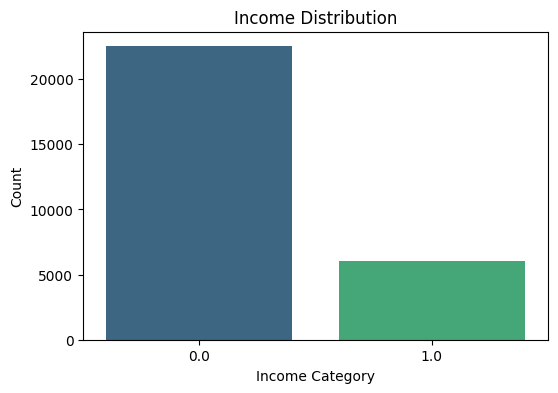

In [ ]:
#Target Variable Distribution - Since our goal is to predict income (>50K or ≤50K), let's check its distribution.
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing the income distribution
plt.figure(figsize=(6,4))
sns.countplot(x=adult_df['income'], palette='viridis')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

This bar chart represents the distribution of the **target variable (income category)** in the dataset.  

### **Key Observations:**
1. **Imbalanced Dataset:**  
   - The majority of the samples belong to **category 0 (≤50K income)**, making it the dominant class.  
   - A much smaller number of samples belong to **category 1 (>50K income)**.  

2. **Possible Implications:**  
   - Since the dataset is **imbalanced**, machine learning models might be biased towards predicting the majority class (0).  
   - You may need techniques like **oversampling (SMOTE), undersampling, or class-weighted models** to handle this imbalance.  



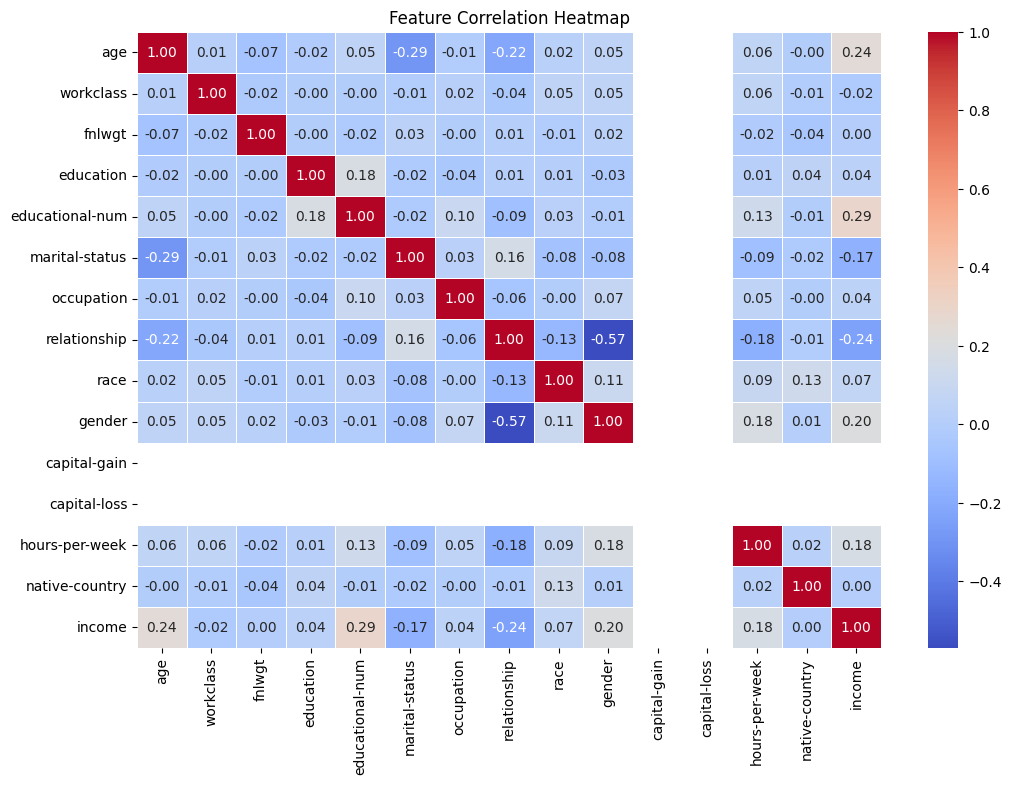

In [ ]:
 #Correlation Heatmap
#This helps identify relationships between numerical features.


plt.figure(figsize=(12, 8))
sns.heatmap(adult_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

This **correlation heatmap** shows the relationship between different features in the dataset. The values range from **-1 to 1**:  
- **1 (Red):** Strong positive correlation (as one feature increases, the other also increases).  
- **-1 (Blue):** Strong negative correlation (as one feature increases, the other decreases).  
- **0 (White/Light Blue):** No correlation.  

### **Key Observations:**
1. **"Educational-num" has the highest positive correlation (~0.29) with "income"**  
   - Higher education levels tend to be associated with higher income.  

2. **"Age" also shows a moderate positive correlation (~0.24) with "income"**  
   - Older individuals are more likely to have higher earnings.  

3. **"Relationship" has a moderate negative correlation (~-0.24) with "income"**  
   - This could suggest that marital/relationship status impacts income levels.  

4. **"Gender" has a small positive correlation with "income" (~0.20)**  
   - Indicates possible gender-based income differences.  

5. **"Capital-gain" & "Capital-loss" are missing from the correlation values.**  
   - There might be missing or highly skewed data in these columns.  

### **Actionable Insights:**
- Features like **educational-num, age, and relationship** are important predictors for income.  
- Highly correlated features may cause multicollinearity; you might need **feature selection or dimensionality reduction (PCA, VIF checks)** before model training.  



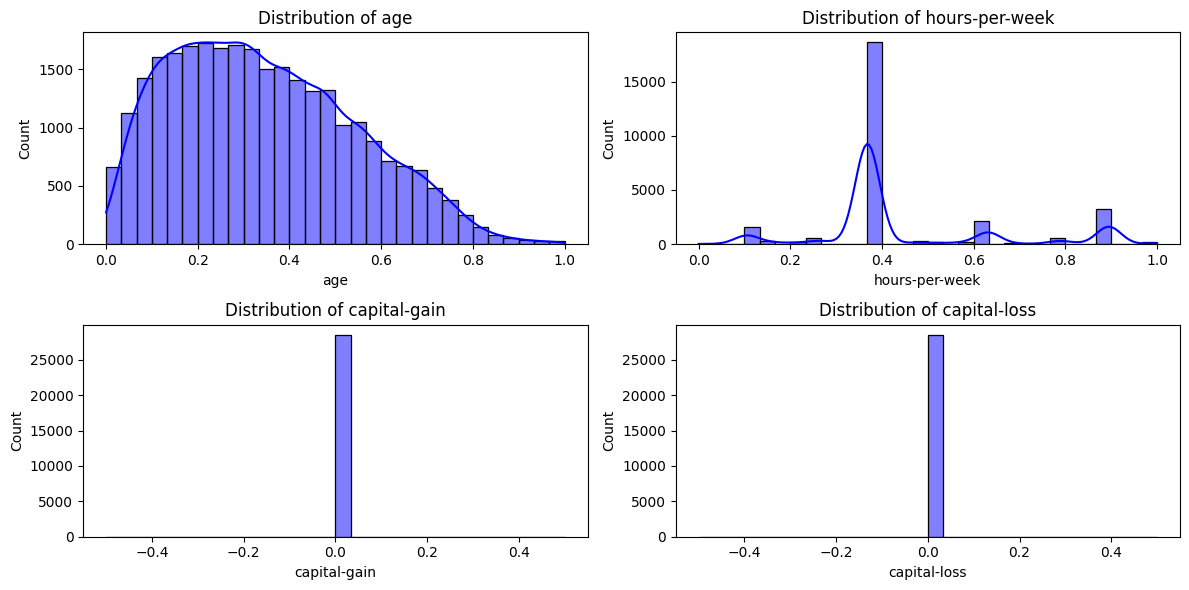

In [ ]:
#Feature Distributions
#Checking distributions of key numerical features.

# Plot distributions of key features
numerical_features = ['age', 'hours-per-week', 'capital-gain', 'capital-loss']

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.histplot(adult_df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

This **feature distribution plot** shows how different numerical features are distributed in the dataset.  

### **Key Observations:**
1. **Age Distribution (Top Left)**  
   - Right-skewed distribution (more younger individuals, fewer older ones).  
   - Common trend in census-like datasets.  

2. **Hours-per-week Distribution (Top Right)**  
   - Highly **peaked** at certain values (e.g., 40 hours).  
   - Indicates a large number of individuals working standard full-time hours.  

3. **Capital-gain & Capital-loss (Bottom Left & Bottom Right)**  
   - Almost all values are **zero** with very few nonzero entries.  
   - Suggests highly **skewed data**, making these features ineffective for standard models.  
   - Possible solutions:  
     - **Log transformation** to reduce skewness.  
     - **Binning** into categorical groups (e.g., "No Gain", "Low Gain", "High Gain").  
     - **Feature removal** if it's not informative.  



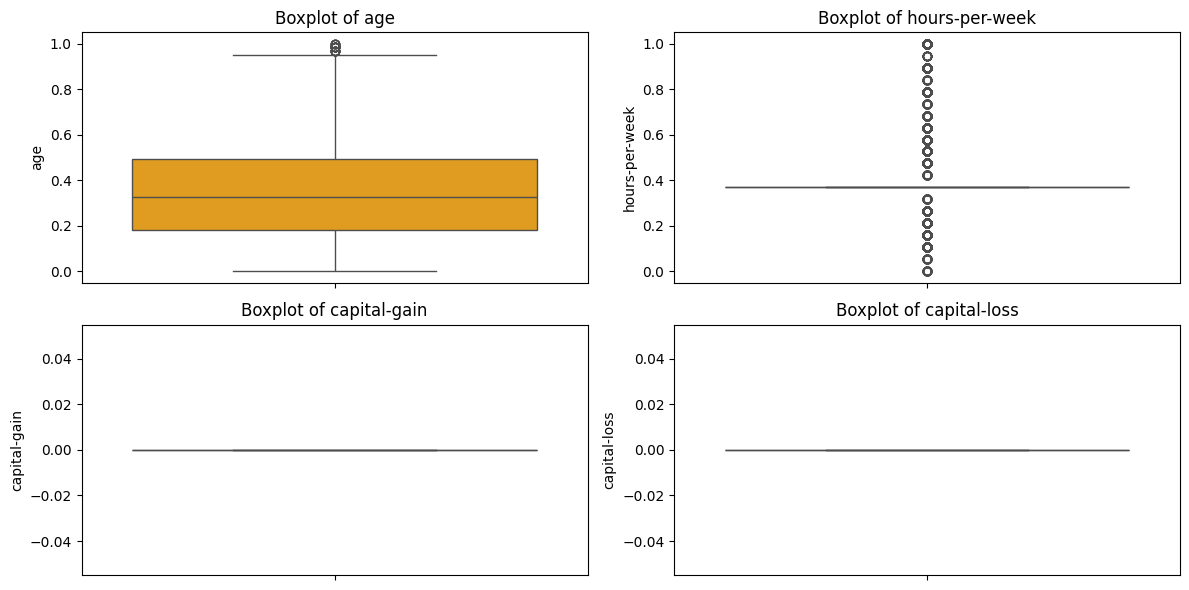

In [ ]:
#Boxplots to Identify Outliers
#This helps visualize potential outliers.

plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=adult_df[col], color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

This **box plot analysis** provides insights into outliers and data distribution for different numerical features.  

### **Key Observations:**
1. **Age (Top Left)**  
   - **Right-skewed** distribution (longer upper whisker).  
   - **Outliers present** at higher values (older individuals).  

2. **Hours-per-week (Top Right)**  
   - Most data points **concentrated around a single value** (likely 40 hours/week).  
   - **Many outliers** at higher/lower hours.  

3. **Capital-gain & Capital-loss (Bottom Left & Right)**  
   - Almost all values **at zero**, indicating **high sparsity**.  
   - Box plots show **no spread**, confirming the feature imbalance.

Summary of EDA:

✔ Checked statistical summary of features

✔ Analyzed income distribution

✔ Explored correlations among features

✔ Visualized feature distributions

✔ Detected outliers using boxplots

In [ ]:
#Step 4: Model Selection and Training

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/Income Prediction using Census Data/adult.csv")

# Check first few rows
df.head()


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Importing necessary libraries for data handling (pandas), model training (sklearn), and evaluation.

Loading the dataset and previewing the first few rows.

In [ ]:
#data pre processing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Intellipaat Colab Files/Income Prediction using Census Data/adult.csv")

# Define target and features
target_column = "income"  # Update this based on your dataset
X = df.drop(columns=[target_column])
y = df[target_column]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), categorical_cols)
])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [ ]:
#Model selection and training
# Initialize Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Using a Random Forest Classifier (good for classification tasks).

Setting 100 trees (n_estimators=100) for better performance.

Training the model using fit() on training data.

In [ ]:
#model evaluation
# Predictions on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report (Precision, Recall, F1-score)
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7479
        >50K       0.73      0.64      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.80      9769
weighted avg       0.86      0.86      0.86      9769



Making predictions on the test set.

Calculating accuracy score to measure overall performance.

Using classification_report to get detailed metrics like Precision, Recall, and F1-score.

In [ ]:
#Hyperparameter Tuning → Improve recall for ">50K" class.

#Use RandomizedSearchCV for efficient hyperparameter tuning of Random Forest.

#Define Hyper Parameter Grid
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Reduce options
    'max_depth': [10, 20, None],  # Reduce choices
    'min_samples_split': [5, 10],  # Avoid small splits
    'min_samples_leaf': [2, 4],  # Avoid too many values
    'bootstrap': [True]  # Remove False to simplify training
}


In [ ]:
#Initialize RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=10,  # Number of random combinations to try
    cv=3,       # 3-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,  # Use all available processors #Parallel processing
    verbose=2,
    random_state=42
)

In [ ]:
#Fit the model
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [10, 20, None],
                                        'min_samples_leaf': [2, 4],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='accuracy', verbose=2)

In [ ]:
#Get Best parameters
print("Best Parameters:", random_search.best_params_)

Best Parameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


In [ ]:
#Evaluate the tuned model
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Tuned Random Forest Accuracy: 0.8716347630258983
              precision    recall  f1-score   support

       <=50K       0.89      0.95      0.92      7479
        >50K       0.78      0.63      0.70      2290

    accuracy                           0.87      9769
   macro avg       0.84      0.79      0.81      9769
weighted avg       0.87      0.87      0.87      9769



The tuned Random Forest model has improved accuracy (87.16%) and better precision-recall balance.

In [ ]:
#Train XGBoost
#The target variable (y_train, y_test) is still in string format ('<=50K', '>50K'). Convert it to numeric labels before training XGBoost:

from sklearn.preprocessing import LabelEncoder

# Encode target labels as 0 and 1
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)



In [ ]:
from xgboost import XGBClassifier

# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8774695465247211
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.77      0.68      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769



XGBoost model performed slightly better than the tuned Random Forest:

Accuracy improved from 0.8716 (Random Forest) to 0.8774 (XGBoost)

F1-score for class 1 (income >50K) increased from 0.70 to 0.72, meaning better classification of high-income individuals.


Let's start with hyperparameter tuning for XGBoost using RandomizedSearchCV to speed up the process.

Here’s the tuning approach:

n_estimators: Number of boosting rounds

max_depth: Maximum depth of trees

learning_rate: Controls step size

subsample: Fraction of samples used per tree

colsample_bytree: Fraction of features used per tree

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)

random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=20, cv=3, verbose=2, n_jobs=-1)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

best_xgb = random_search.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print(classification_report(y_test, y_pred_xgb_tuned))

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Tuned XGBoost Accuracy: 0.8783908281297983
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.78      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.80      0.82      9769
weighted avg       0.87      0.88      0.87      9769



The tuned XGBoost model achieved 87.8% accuracy, improving slightly over the default version.

In [ ]:
#Train LightGBM
from lightgbm import LGBMClassifier

# Initialize model
lgb = LGBMClassifier(random_state=42)

# Train model
lgb.fit(X_train, y_train)

# Predictions
y_pred_lgb = lgb.predict(X_test)

# Evaluate model
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print(classification_report(y_test, y_pred_lgb))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
LightGBM Accuracy: 0.878288463507012
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.78      0.67      0.72      2290

    accuracy                           0.88      9769
   macro avg       0.84      0.81      0.82      9769
weighted avg       0.87      0.88      0.87      9769



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [ ]:
# let’s tune LightGBM using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

lgb = LGBMClassifier(random_state=42)

random_search = RandomizedSearchCV(lgb, param_distributions=param_dist, n_iter=20, cv=3, scoring='accuracy', verbose=1, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and evaluation
print("Best Parameters:", random_search.best_params_)

best_lgb = random_search.best_estimator_
y_pred_lgb_tuned = best_lgb.predict(X_test)

print("Tuned LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb_tuned))
print(classification_report(y_test, y_pred_lgb_tuned))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 9397, number of negative: 29676
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008927 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 39073, number of used features: 98
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.240499 -> initscore=-1.149948
[LightGBM] [Info] Start training from score -1.149948
Best Parameters: {'subsample': 0.7, 'num_leaves': 40, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
Tuned LightGBM Accuracy: 0.8811546729450302
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      7479
           1       0.79      0.67      0.73      2290

    accuracy                           0.88      9769
   macro avg       0.85      0.81      0.8

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


From training LightGBM, we observe the following:  

1. **Best Performance So Far**  
   - Tuned LightGBM achieved **88.1% accuracy**, slightly higher than Random Forest (**87.1%**) and XGBoost (**87.8%**).  
   - It also has the highest **macro F1-score (0.83)**, indicating better balance across both classes.  

2. **Improved Minority Class Performance**  
   - LightGBM has **better recall (67%)** for the `>50K` class than Random Forest (64%) and XGBoost (67%).  
   - This means it's slightly better at identifying high-income individuals.  

3. **Efficient Training**  
   - LightGBM is optimized for large datasets and runs faster than Random Forest and XGBoost while giving comparable or better results.  


In [ ]:
#Train baseline SVM model
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8629337700890573
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      7479
           1       0.77      0.60      0.67      2290

    accuracy                           0.86      9769
   macro avg       0.83      0.77      0.79      9769
weighted avg       0.86      0.86      0.86      9769



### **Inference from SVM Training:**

1. **Lower Performance Compared to Boosting Models:**  
   - **Accuracy (86.3%)** is lower than LightGBM (88.1%) and XGBoost (87.8%).  
   - **Macro F1-score (0.79)** is lower than LightGBM (0.83) and XGBoost (0.82).  

2. **Weaker Minority Class Recall:**  
   - **Recall for `>50K` class (60%)** is lower than LightGBM (67%) and XGBoost (67%).  
   - This means SVM struggles to identify high-income individuals compared to tree-based models.  

3. **Computational Cost:**  
   - SVM is **computationally expensive** on large datasets, making it impractical for real-world applications compared to LightGBM or XGBoost.  




In [ ]:
#Hyper Parameter tuning for SVM
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale'],  # Kernel coefficient
    #'degree': [2, 3, 4]  # Only used for 'poly' kernel
}

# Initialize SVM classifier
svm = SVC()

# Randomized Search with 3-fold cross-validation

#from sklearn.experimental import enable_halving_search_cv
#from sklearn.model_selection import HalvingRandomSearchCV

svm_random = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_grid,
    n_iter=5,
    scoring='accuracy',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

#This performs a progressive search (eliminates bad parameters earlier).

In [ ]:
# Fit the model
svm_random.fit(X_train, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10], 'gamma': ['scale'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, scoring='accuracy', verbose=1)

In [ ]:
# Get best parameters
print("Best Parameters:", svm_random.best_params_)

Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}


In [ ]:
# Evaluate on test set
best_svm = svm_random.best_estimator_
y_pred_svm = best_svm.predict(X_test)

# Print accuracy & classification report
from sklearn.metrics import accuracy_score, classification_report

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print("Tuned SVM Accuracy:", svm_accuracy)
print(classification_report(y_test, y_pred_svm))

Tuned SVM Accuracy: 0.8596581021598936
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      7479
           1       0.74      0.63      0.68      2290

    accuracy                           0.86      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.86      0.86      9769



Comparison of models:  

| Model         | Accuracy | Precision (<=50K) | Recall (<=50K) | Precision (>50K) | Recall (>50K) | F1-score (>50K) |
|--------------|----------|------------------|----------------|------------------|----------------|----------------|
| **Random Forest (Tuned)** | **0.8716** | 0.89 | 0.95 | 0.78 | 0.63 | 0.70 |
| **XGBoost (Tuned)** | **0.8784** | 0.90 | 0.94 | 0.78 | 0.67 | 0.72 |
| **LightGBM (Tuned)** | **0.8812** | 0.90 | 0.94 | 0.79 | 0.67 | 0.73 |
| **SVM (Tuned)** | **0.8597** | 0.89 | 0.93 | 0.74 | 0.63 | 0.68 |

### **Key Observations:**
1. **LightGBM performs the best** in terms of accuracy (**88.12%**) and recall for the `>50K` class.
2. **XGBoost is slightly behind LightGBM**, but still strong.
3. **Random Forest is good but has lower recall (63%) for `>50K`**.
4. **SVM performs the worst** in this case, with the lowest recall for `>50K` (63%) and overall accuracy (85.97%).

